In [1]:
import pandas as pd
import numpy as np

In [25]:
# Read the data
data = pd.read_csv('train.tsv',sep='\t', header=None, names=["id", "label", "statement", "subject(s)", "speaker","speaker's job title", "state info", "party affiliation", "barely true counts", "false counts","half true counts", "mostly true counts", "pants on fire counts", "context"])
data.head()

,id,label,statement,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [59]:
from sklearn.feature_extraction.text import CountVectorizer

def get_word_freq(data):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(data)
    word_freq = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis = 0).tolist()[0]))
    return word_freq


0         82
1        141
2        105
3         78
4         54
        ... 
10235     90
10236     78
10237    176
10238     62
10239    181
Name: statement, Length: 10240, dtype: int64
82


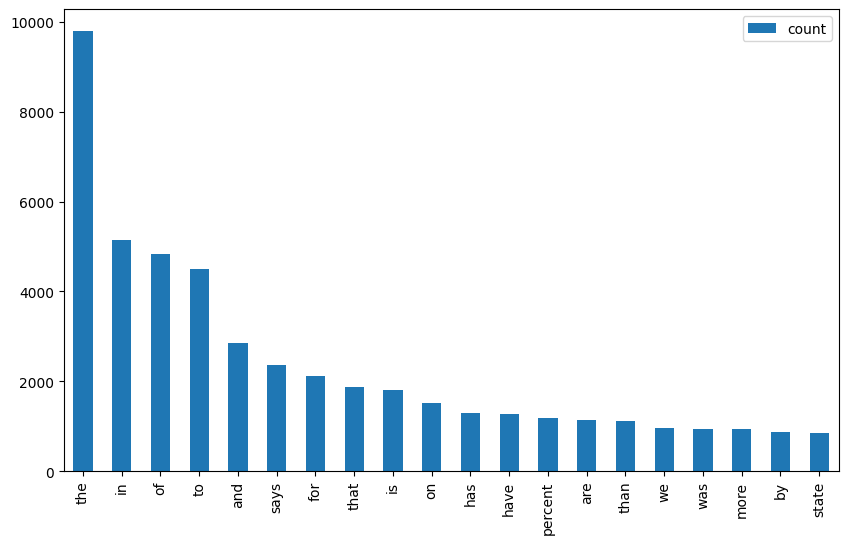

In [29]:
from matplotlib import pyplot as plt

word_freq_dict = get_word_freq(data['statement'])
word_freq = pd.DataFrame.from_dict(word_freq_dict, orient='index', columns=['count'])
word_freq = word_freq.sort_values(by=['count'], ascending=False)
word_freq.head(20).plot(kind='bar', figsize=(10,6))
plt.show()


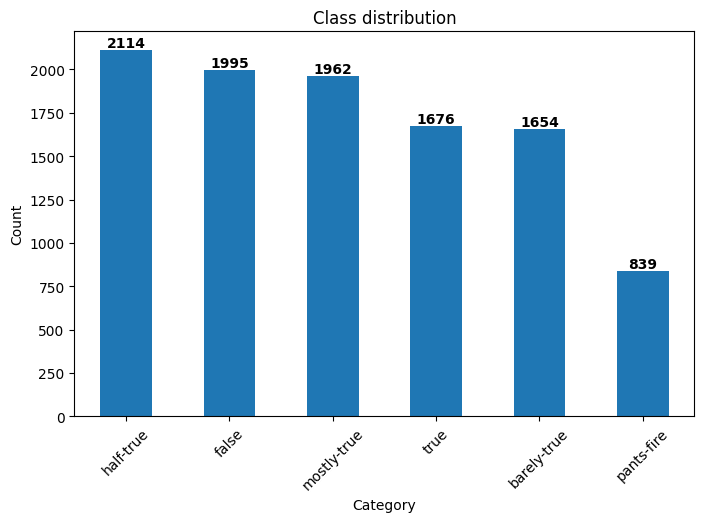

In [65]:
class_distribution = data['label'].value_counts()
plt.figure(figsize=(8,5))
bars = class_distribution.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Class distribution')
plt.xticks(rotation = 45)

for i,v in enumerate(class_distribution):
    bars.text(i, v, str(v), horizontalalignment='center', verticalalignment='bottom', fontweight='bold')

plt.show()

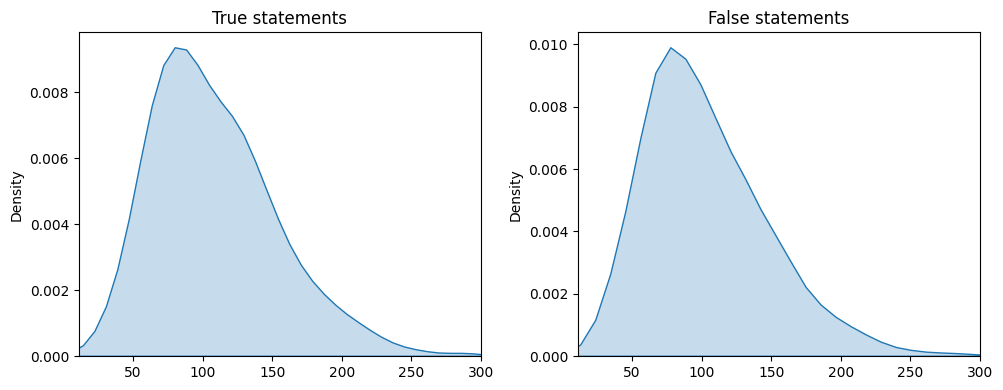

True statments statistics:

count    3790.000000
mean      109.061214
std        51.302033
min        11.000000
25%        75.000000
50%       102.000000
75%       135.000000
max      1592.000000
Name: statement, dtype: float64

Fake statments statistics:

count    4488.000000
mean      104.195410
std        54.325529
min        11.000000
25%        71.000000
50%        96.000000
75%       130.000000
max      2099.000000
Name: statement, dtype: float64


In [110]:
import seaborn as sns

length_of_true_statments  = data.loc[(data['label'] == 'true') | (data['label'] == 'mostly=true') |(data['label']=='half-true'), 'statement'].apply(len) 
length_of_false_statments = data.loc[(data['label']=='false')| (data['label']=='barely-true')| (data['label']=='pants-fire') , 'statement'].apply(len)


# # plt.hist(length_of_statments, bins='auto', density=True)
# plt.xlim(11, 300)
# # plt.figure(figsize=(1,2))
# plt.xlabel('Length of statements')
# plt.ylabel('Frequency of statements')
# plt.title('Histogram of length of statements')


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.kdeplot(np.array(length_of_true_statments), fill=True, ax=axes[0])
axes[0].set_title('True statements')
axes[0].set_xlim(11, 300)

sns.kdeplot(np.array(length_of_false_statments), fill=True, ax=axes[1])
axes[1].set_title('False statements')
plt.tight_layout()
axes[1].set_xlim(11, 300)
plt.show()

print("True statments statistics:\n")
print(length_of_true_statments.describe())

print("\nFake statments statistics:\n")
print(length_of_false_statments.describe())